In [1]:
from selenium import webdriver

In [2]:
from selenium.webdriver.common.keys import Keys

In [3]:
from selenium.webdriver.support import expected_conditions as EC

time模块是防止页面刷新不及时造成软件报错。

In [4]:
import time

In [ ]:
import os ##判断文件是否为空
#os.stat("file").st_size == 0

## 第一步：创建Chrome浏览器对象，这会在电脑上在打开一个浏览器窗口

In [5]:
##selenium 开启开发者工具（F12）,启动浏览器时会自动打开开发者工具
##这里是因为只有当我打开开发者工具的时候才能模拟登录
options = webdriver.ChromeOptions()
options.add_argument("--auto-open-devtools-for-tabs")

In [6]:
driver = webdriver.Chrome(chrome_options=options)

<ipython-input-6-68a342a22e3f>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


driver = webdriver.Chrome()

In [7]:
url = "https://study.enaea.edu.cn/login.do;jsessionid=64C3D842FE40C8AC865A49D89542074B.web55"
driver.get(url) 

##### selenium控制浏览器操作的一些方法

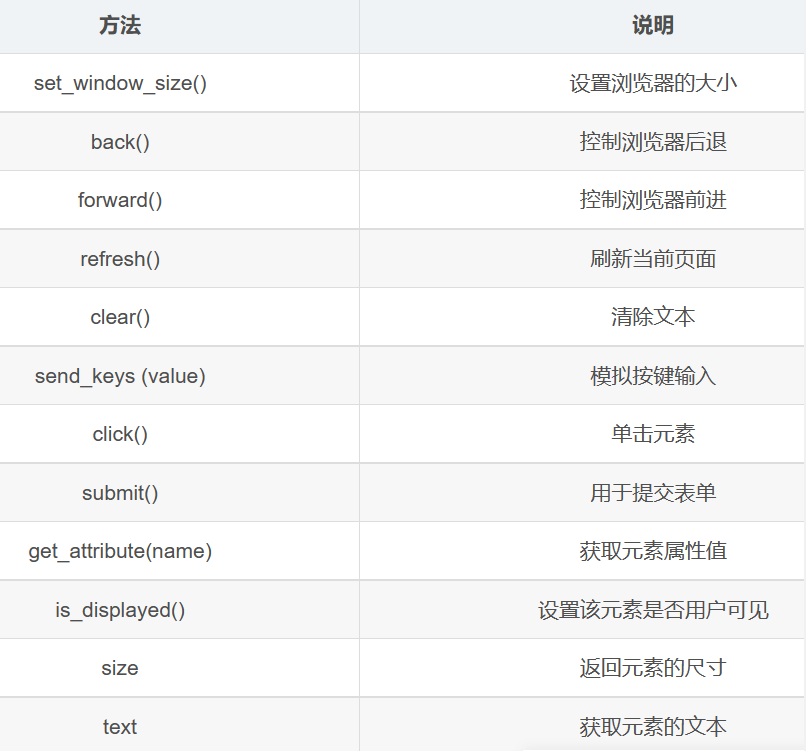

In [8]:
#3.刷新浏览器，这一步也可以不用
driver.refresh()
print('已进入登录页面。')

## 第二步：登录

2021.10.18.登录问题还未解决，猜测可能会用到selenium的iframe表单功能，之后有时间再做吧
2021.10.20 登录问题已解决，代码没有问题，可能是服务器有某种反抗机制，每次页面打开只能登录一次

13811647221
123456gm

In [ ]:
##创建一个文件夹，当文件夹为空时，print(系统检测到您没有上次登录的保存记录，请输入以下信息)
with open("account_password_record.txt","a+",encoding = "utf_8") as f:
    if os.stat("account_password_record.txt").st_size==0:
        print("程序检测到您没有上次登录的保存记录，请输入以下信息。")
        print('请输入您的账号：')
        account_text = input()
        f.write(account_text)
        f.write("\n")
        print("请输入您的密码：")
        password_text = input()
        f.write(password_text)       
        #print("为了下次使用本程序时能自动登录，请在account_password_record.txt中填写完您的登录信息。")
    else:
        ##这里是一个笨办法，因为在a+的时候无法执行readline操作，所以我把原先的文档关掉后再以r方式读取
        f.close()
        with open("account_password_record.txt","r",encoding = "utf_8") as f:
            account_text = f.readline()
            password_text = f.readline()

with open("account_password_record.txt","r",encoding = "utf_8") as f: print(f.readline())

In [ ]:
print("登录记录中您的账号为：")
print(account_text)

In [ ]:
print("您的密码为：")
print(password_text)

旧版本2：控制台输入账号密码

print('请输入您的账号：') account_text = input() print("请输入您的密码：") password_text = input()

旧版本1：直接代码中保存账号密码

account = driver.find_element_by_name('username')
account.send_keys(13811647221)
#输入用户名
time.sleep(2)

password = driver.find_element_by_name('password')##这里不用_class_name
password.send_keys('123456gm')
#输入密码

In [ ]:
account = driver.find_element_by_name('username')
account.send_keys(account_text)
time.sleep(2)

In [ ]:
password = driver.find_element_by_name('password')
password.send_keys(password_text)

In [11]:
button_log_in = driver.find_element_by_class_name('btn-row')
button_log_in.click()##每次打开页面，只被允许登录一次
time.sleep(3)

In [ ]:
print("登录成功！")

## 第三步：在当前窗口找定位，模拟点击button

1.Selenium提供了8种定位方式:<br/>
id<br/>
name<br/>
class name<br/>
tag name<br/>
link text<br/>
partial link text<br/>
xpath<br/>
css selector<br/>

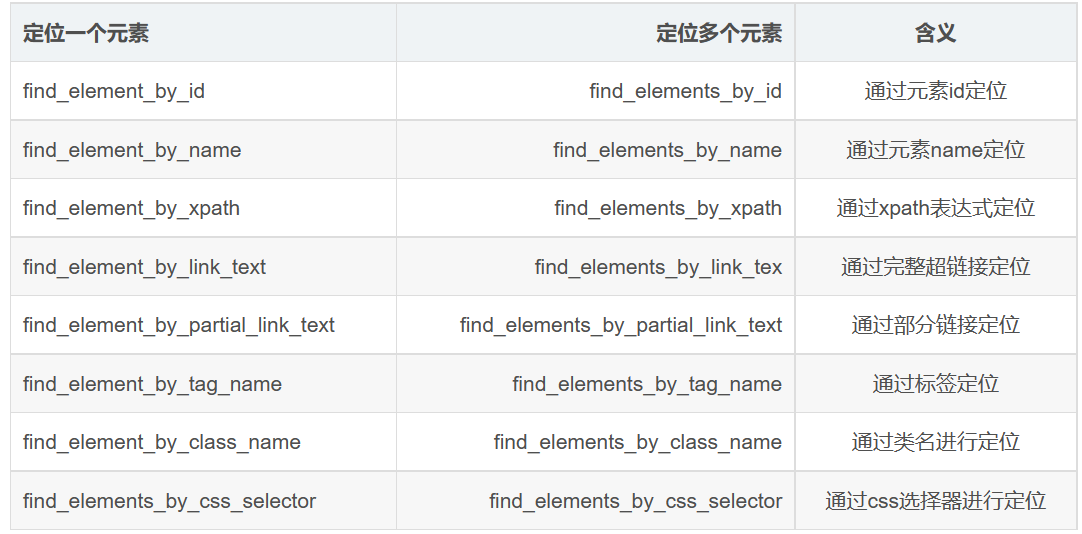

In [12]:
button_log_in = driver.find_element_by_id('J_submitReg')
button_log_in.click()
time.sleep(10)

In [ ]:
print("正在切换窗口。")

In [13]:
button_log_in = driver.find_element_by_css_selector('.button.intoStudy')##刚开始用_class_name做的，不知道为啥一直报错，就改成了css_select,没想到居然通过了
button_log_in.click()

In [ ]:
print("进入学习界面成功！")

## 第三步：切换窗口，继续点击

### 多窗口切换
在页面操作过程中有时候点击某个链接会弹出新的窗口，这时就需要主机切换到新打开的窗口上进行操作。WebDriver提供了switch_to.window()方法，可以实现在不同的窗口之间切换。

方法	                说明<br/>
current_window_handle	获得当前窗口句柄<br/>
window_handles	      返回所有窗口的句柄到当前会话<br/>
switch_to.window()	   用于切换到相应的窗口，与上一节的switch_to.frame()类似，前者用于不同窗口的切换，后者用于不同表单之间的切换。

In [14]:
#1.获得最初搜索窗口句柄
sreach_windows = driver.current_window_handle

In [15]:
#1.获得当前所有打开的窗口的句柄

time.sleep(3)

driver.switch_to.window(all_handles[0])

2021.11.20之前一直切换窗口后模拟点击报错，但是我切换回最初的窗口，再切换回来，模拟点击就可以运行，之前看到博客说time.sleep可以避免报错，有空再试试吧
2021.11.21试验过了，time.sleep没有效果，但是我又发现，不需要切换回最初的窗口，只需要刷新所有窗口句柄就行了

In [16]:
def refresh_window_handles():
    all_handles = driver.window_handles
    driver.switch_to.window(all_handles[-1])##跳转到最新的窗口

In [17]:
refresh_window_handles()

In [19]:
print("倒计时：")
for i in range(5):##设置倒计时
    print(5-i)
    time.sleep(1) 

倒计时：
10
9
8
7
6
5
4
3
2
1


In [20]:
button_log_in = driver.find_element_by_link_text("查看")
button_log_in.send_keys(Keys.ENTER) 

In [21]:
print('跳转到查看窗口')
refresh_window_handles()

In [22]:
time.sleep(3)

## 第四步：处理20分钟出现的弹窗

### 警告框处理
在WebDriver中处理JavaScript所生成的alert、confirm以及prompt十分简单，具体做法是使用 switch_to.alert 方法定位到 alert/confirm/prompt，然后使用text/accept/dismiss/ send_keys等方法进行操作。

text	返回 alert/confirm/prompt 中的文字信息<br/>
accept()	接受现有警告框<br/>
dismiss()	解散现有警告框<br/>
send_keys(keysToSend)	发送文本至警告框。keysToSend：将文本发送至警告框。

###### 不知道为什么哈，selenium无法识别这个网站的弹窗，我只好用定位弹窗后click

旧版本：def watchvideo_click(i):##模拟点击开始学习视频
    path = '/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[{}]/td[6]/a'.format(i)
    button_video = driver.find_element_by_xpath(path)
    #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[13]/td[6]/a
    ##/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[12]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[22]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[14]/td[6]/a
    button_video.send_keys(Keys.ENTER) 
    refresh_window_handles()

In [ ]:
def watchvideo_click(i):
    ##考虑若path不能locate,则跳出本次循环
    try:
        path = '/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[{}]/td[6]/a'.format(i)
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[20]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[2]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[2]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[21]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[2]/td[6]/a
        #/html/body/div[4]/div[2]/div/div/div[3]/div/table/tbody/tr[22]/td[6]/a
        button_video = driver.find_element_by_xpath(path)
    except:
        return 0
    else:
        button_video.send_keys(Keys.ENTER) 
        refresh_window_handles()
        return 1

In [24]:
def progress_text(ch):##检查进度条文本
    progress_path = "/html/body/div[2]/div/div[2]/div[1]/ul/li[1]/div[2]/ul/li[{}]/div/div[2]".format(ch)
    progress = driver.find_element_by_xpath(progress_path)
    text = int(progress.text.split('%')[0]) 
    return text

progress_path = "/html/body/div[2]/div/div[2]/div[1]/ul/li[1]/div[2]/ul/li[4]/div/div[2]"
progress = driver.find_element_by_xpath(progress_path)
text = int(progress.text.split('%')[0])

In [25]:
def progress_check(i):##检查进度条
    ch = 1
    while ch<10:
        try:
            text = progress_text(ch)           
        except:
            ch=0  ##播放完
            print("本章节已播放完毕！准备进入下一章节！")
            return ch
        else:
            print("第{}集的进度为{}%！".format(ch,text))
            if text<100:###播放进度小于100时，跳出，点击，否则继续循环
                check = 1              
                return ch
            ch +=1  

In [26]:
def progress_button_click(ch):##点击课件集数
    character_path = "/html/body/div[2]/div/div[2]/div[1]/ul/li[1]/div[2]/ul/li[{}]/div/div[3]".format(ch)
    driver.find_element_by_xpath(character_path).click()
    print("跳转播放！")

旧版本：def stop_check(ch):##检查是否暂停
    t1 = progress_text(ch)
    time.sleep(100)
    t2 = progress_text(ch)
    if t1==t2:
        print("由于网络等问题停止播放。。。重新加载中！")
        refresh_window_handles()
        driver.find_element_by_class_name("ccH5TogglePlay").send_keys(Keys.ENTER) 

In [ ]:
def stop_check(ch):
    t1 = progress_text(ch)
    time.sleep(120)
    t2 = progress_text(ch)
    if t1==t2:
        print("由于网络等问题停止播放。。。重新加载中！")        
        refresh_window_handles()
        time.sleep(3)
        driver.find_element_by_xpath("/html/body/div[1]/div[2]/div/div/div/section/span[1]").click() 
                                          #ccH5TogglePause #/html/body/div[1]/div[2]/div/div/div/section/span[1]暂停
                                          #ccH5TogglePlay #/html/body/div[1]/div[2]/div/div/div/section/span[1]开始

num=10     #我只设置了点击10次弹窗，当然不是真的会出现10次弹窗
while(num):
    all_handles = driver.window_handles
    driver.switch_to.window(all_handles[-1])
    try:
        al = driver.find_element_by_xpath("/html/body/div[6]/table/tbody/tr[2]/td[2]/div[3]/button")            
    except:
        time.sleep(5)
        
        if progress_check(i)==0:
            break
        stop_check(ch)
        ##这里还有一个bug没有修复，就是当前面还有集没看完时，我还没有设置跳转，因为不方便直接跳转，我还没有想出来好一点的方法
    else:
        al.click()
        num=num-1
        print("出现第{}个弹窗,已确认。".format(10-num))
        ##print(num)
        ##time.sleep(1200)

In [28]:
def alertlike_check_and_click(i,ch):##检查弹窗和点击弹窗，当然不是真的会出现10次弹窗
    num=10     #我只设置了点击10次弹窗
    time.sleep(1000)
    while (num):
        refresh_window_handles()
        try:
            al = driver.find_element_by_xpath("/html/body/div[6]/table/tbody/tr[2]/td[2]/div[3]/button")            
        except:
            time.sleep(5)           
            if progress_check(i)==0:##当播放完毕时，就跳出章节
                all_handles =driver.window_handles 
                driver.switch_to.window(all_handles[1])
                break
            stop_check(ch)
             ##这里还有一个debug没有修复，就是当前面还有集没看完时，我还没有设置跳转（我的跳转只考虑了后面有章节没看完），因为不方便直接跳转，我还没有想出来好一点的方法
        else:
            al.click()
            num=num-1
            print("出现第{}个弹窗,已确认。".format(10-num))
            ##print(num)
            time.sleep(1200)

In [29]:
def turn_page():##翻页
    time.sleep(3)
    driver.find_element_by_css_selector(".next.paginate_button").click()

旧版本：page = 1
refresh_window_handles()
while (4-page):
    for i in range(16,22):
        watchvideo_click(i) 
        time.sleep(2)
        ch = progress_check(i)
        if ch:
            progress_button_click(ch)
        else:
            all_handles =driver.window_handles 
            driver.switch_to.window(all_handles[1])
            continue
        alertlike_check_and_click(i,ch)
    print("第{}页已播放完毕！".format(page))
    turn_page()
    page +=1
    if(page<4):
        print("跳转至第{}页！".format(page))
    

In [ ]:
page = 1
#all_handles =driver.window_handles 
#driver.switch_to.window(all_handles[1])
while (4-page):
    for i in range(1,23):        
        if watchvideo_click(i)==0:
            continue
        time.sleep(2)
        ch = progress_check(i)
        if ch:
            progress_button_click(ch)
        else:
            all_handles =driver.window_handles 
            driver.switch_to.window(all_handles[1])
            continue
        alertlike_check_and_click(i,ch)
    print("第{}页已播放完毕！".format(page))
    turn_page()
    page +=1
    if(page<4):
        print("跳转至第{}页！".format(page))

In [1]:
##如果要用.py运行则替换成下面这个代码块
try:
    page = 1
    all_handles =driver.window_handles 
    driver.switch_to.window(all_handles[1])
    while (4-page):
        for i in range(2,23):
            if watchvideo_click(i)==0:
                continue
            time.sleep(2)
            ch = progress_check(i)
            if ch:
                progress_button_click(ch)
            else:
                all_handles =driver.window_handles 
                driver.switch_to.window(all_handles[1])
                continue
            alertlike_check_and_click(i,ch)
        print("第{}页已播放完毕！".format(page))
        turn_page()
        page +=1
        if(page<4):
            print("跳转至第{}页！".format(page))
except:
    driver.quit()
    print("程序异常！已结束进程！请检查是否有非法操作。比如人为切换窗口，或者关闭浏览器，如果出现代码问题请联系博主")
else:
    driver.quit()
    print("正常结束进程")

time.sleep就。有个地方很无语，每次有time.sleep的时候中断内核就非常困难！

##2021.11.26还有一个bug,我还没学会拖动进度条，有时间再做吧

driver.find_element_by_class_name("ccH5TogglePlay").click()

In [ ]:
driver.refresh()

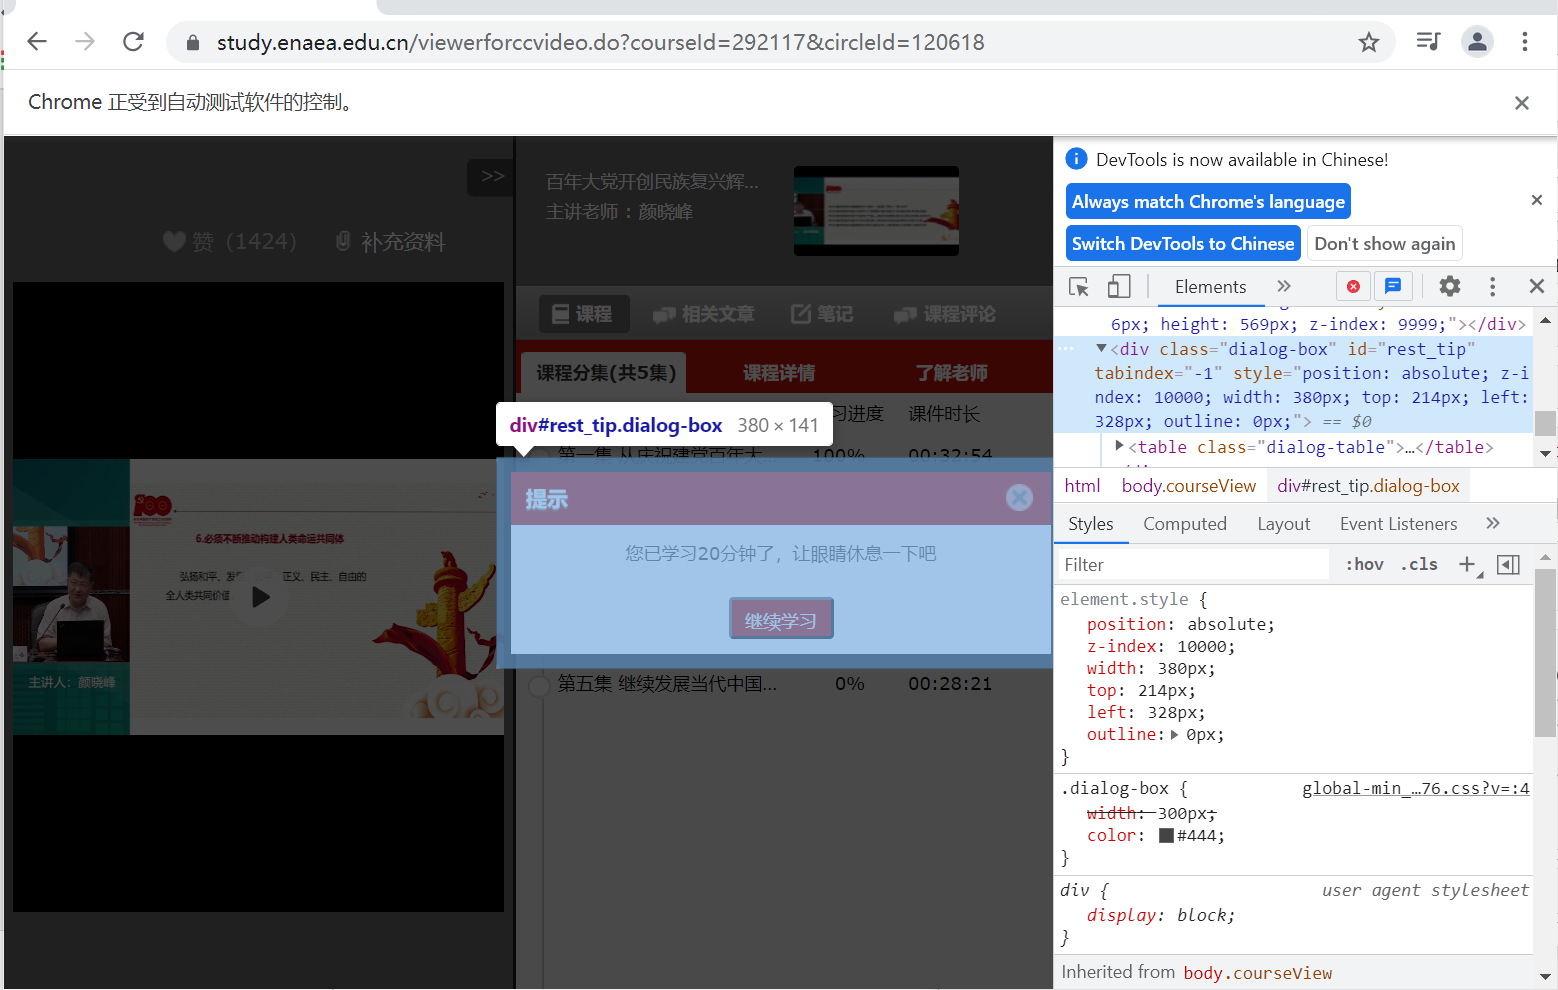

In [ ]:
driver.quit()

driver.close()